In [1]:
# Imports libraries so we can do math and stats
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Imports the data 'csv' file

# Use this if there was no alarm event in the temp
df = pd.read_csv('B582127C.csv', skiprows=range(0,4), date_parser = pd.to_datetime)
# use this if there was an alarm event in temp readings
# df = pd.read_csv('B582127C.csv', skiprows=range(0,9), date_parser = pd.to_datetime)

In [3]:
# This code replaces Celsius to Fahrenheit in column 1. 
# If you need to change to any other column, then just change red 'P1' to new column name
def f(x):
    x = (x * 1.8) + 32
    return float(x)

df['P1'] = df['P1'].apply(f)

In [66]:
# Changes the names of the columsn and runs basic stats on each day
df.columns = ['Temp1','Temp2','Time','Date']
df['Temp1'] = df['Temp1'].astype(float)

# df.groupby(['Date','Time'])['Temp1'].agg([np.mean,'count',np.max,np.min,np.median])
GD = df.groupby(['Date'])['Temp1','Time'].agg([np.mean,'count',np.max,np.min,np.median])

In [36]:
TempCount = df.loc[df['Temp1'] <= 67]

In [37]:
TempCount.describe()

,Temp1,Temp2
count,93.000000,93.0
mean,66.605097,0.0
std,0.237757,0.0
min,66.254000,0.0
25%,66.380000,0.0
50%,66.578000,0.0
75%,66.848000,0.0
max,66.992000,0.0


In [38]:
df.describe()

,Temp1,Temp2
count,269.000000,269.0
mean,68.446387,0.0
std,1.974509,0.0
min,66.254000,0.0
25%,66.848000,0.0
50%,67.874000,0.0
75%,69.458000,0.0
max,73.490000,0.0


In [39]:
# attempting to index date values for plotting in the cell below. 
Date = np.unique(GD[::1])
x = df['Date']

In [69]:
GD

Temp1                              
                 mean count    amax    amin  median
Date                                               
2018-12-14  72.111000    36  73.490  70.826  71.906
2018-12-15  68.884812    96  70.718  67.388  68.999
2018-12-16  66.816125    96  67.370  66.254  66.866
2018-12-17  68.019317    41  71.690  66.326  66.524

In [70]:
GD.iloc[0:5]['Temp1']

,mean,count,amax,amin,median
Date,,,,,
2018-12-14,72.111000,36,73.490,70.826,71.906
2018-12-15,68.884812,96,70.718,67.388,68.999
2018-12-16,66.816125,96,67.370,66.254,66.866
2018-12-17,68.019317,41,71.690,66.326,66.524


In [9]:
# Nope
# pd.crosstab(df['Date'], df['Temp1']).plot()
# top = df['Temp1'].value_counts().head(2).index
# df.query('Temp1 in @top').groupby(['Date', 'Temp1']).size().unstack(fill_value=0).plot()

In [10]:
# GD.columns = ['Time', 'Temp1', 'mean','count','median']
# GD.plot(x='Time', y='Temp1', style='o')

In [11]:
# converts Date text to a number Python can read
df['Date'] = pd.to_datetime(df.Date)
Date = df.set_index('Date').resample('H')['Time'].nunique()

Text(0,0.5,'Temperature F')

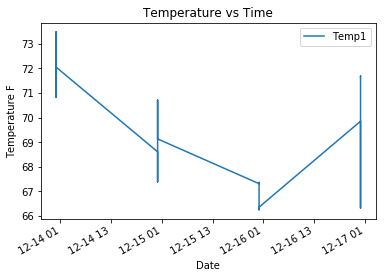

In [12]:
# attempting to plot the temperature vs. date. 
df.plot('Date','Temp1')
plt.title('Temperature vs Time')
# plt.xlabel(Date)
plt.ylabel('Temperature F')

Text(0,0.5,'Temperature F')

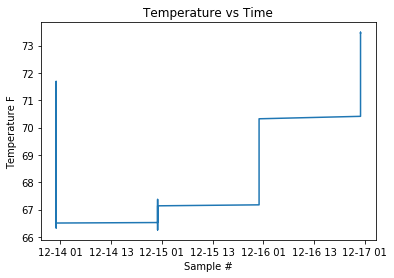

In [13]:
y = df['Temp1']
x = df['Date']
plt.plot(x[::-1],y)
plt.title('Temperature vs Time')
plt.xlabel('Sample #')
plt.ylabel('Temperature F')

In [14]:
GD[0:5]

mean  count    amax    amin  median
Date     Time                                        
12/14/18 15:00  73.454      1  73.454  73.454  73.454
         15:15  73.490      1  73.490  73.490  73.490
         15:30  73.346      1  73.346  73.346  73.346
         15:45  73.400      1  73.400  73.400  73.400
         16:00  73.184      1  73.184  73.184  73.184

In [32]:
# Attempt to for loop with subplots
for key, group in GD:
    group.groupby('Date')['Temp1'].sum().plot(ax=ax,label=key)

TypeError: 'AxesSubplot' object is not iterable

In [71]:
df.groupby([pd.Grouper(level=0),'Time','Date']).size()[0:5]

   Time   Date      
0  10:00  2018-12-17    1
1  09:45  2018-12-17    1
2  09:30  2018-12-17    1
3  09:15  2018-12-17    1
4  09:00  2018-12-17    1
dtype: int64

In [72]:
grouped = df.groupby('Date')
for name, group in grouped:
    plt.plot('Temp')
    

TypeError: 'long' object is not iterable

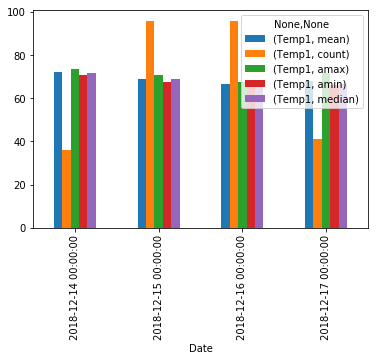

In [82]:
GD.plot.bar()